# Case Study on ANOVA
XYZ Company has offices in four different zones. The company wishes to
investigate the following :

● The mean sales generated by each zone.

● Total sales generated by all the zones for each month.

● Check whether all the zones generate the same amount of sales.

Help the company to carry out their study with the help of data provided.

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import f_oneway

In [2]:
# Reading dataset to python
df=pd.read_csv('Sales_data_zone_wise.csv')
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [3]:
# Analysing the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [4]:
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

# The mean sales generated by each zone.

In [5]:
mean_sales=df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].mean()
mean_sales

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

Text(0, 0.5, 'Mean Sales')

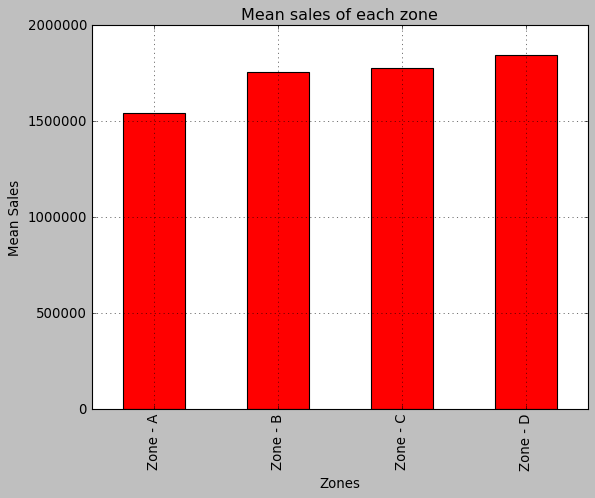

In [6]:
# Visualization of mean sales generated by each zone
plt.style.use('classic')
mean_sales.plot.bar(title='Mean sales of each zone',grid=True, color='red')
plt.xlabel('Zones')
plt.ylabel('Mean Sales')


The mean sales generated by each zone.

Zone - A : 1540493.13 	

Zone - B : 1755559.58

Zone - C : 1772871.03 

Zone - D : 1842926.75

# Total sales generated by all the zones for each month.

In [7]:
total_monthly_sale = df['Zone - A']+df['Zone - B']+df['Zone - C']+df['Zone - D']
df['Total Monthly Sale']= total_monthly_sale
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total Monthly Sale
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


Text(0, 0.5, 'Total Monthly Sale')

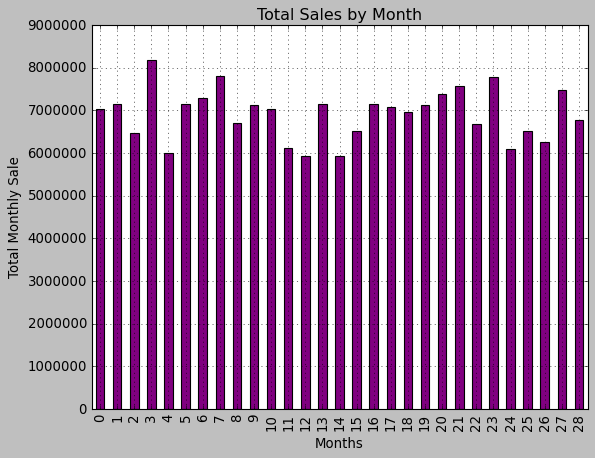

In [8]:
# Visualization of Total Sales by Month
plt.style.use('classic')
total_monthly_sale.plot.bar(title='Total Sales by Month',grid=True, color='purple')
plt.xlabel('Months')
plt.ylabel('Total Monthly Sale')

Here it is clear that the total monthly sale is greater for Month -4

# Check whether all the zones generate the same amount of sales.

Ho : All the zones generate the same amount of sales

Ha : There is a significant difference in the amount of sales generated by all the four zones

In [9]:
F_statistic, pvalue =f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
print('The calculated F statistic :  ',F_statistic)
print('p value :', pvalue)

The calculated F statistic :   5.672056106843581
p value : 0.0011827601694503335


In [10]:
alpha=0.05
if pvalue < alpha:
    print('Rejecting Ho')
else:
    print('Failing to reject Ho')

Rejecting Ho


Here pvalue is less than alpha.So we are rejecting the null hypothesis.

Hence, we can conclude that there is a significant difference in the amount of sales generated by all the four zones